# Kelompok 3

    1. Muhammad Fajrianur       (2009106040)
    2. Muhammad Naufal Wildan   (2009106037)
    3. Muhammad Rifky Cahyadi S (2009106043)

# Pembagian Tugas

Muhammad Fajrianur

    1. Membuat Class Manual
    2. Read Data

Muhammad Naufal Wildan

    1. Evaluasi
    2. Predict
    3. Split Data Manual
    
Muhammad Rifky Cahyadi S

    1. Data Analysis
    2. Data Visualization
    3. Data Modeling

# Dataset

Dataset Yang digunakan di ambil dari kaggle

(https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types)

Dataset Terdiri dari 17 class yang kami buat manual dan berisi 1.230 file image

# Project

Pokemon merupakan salah satu series anime yang sangat populer hingga kini. dalam dunia pokemon terdapat banyak sekali macam dan jenis pokemon. Pada project ini dapat mengkalsifikasikan jenis-jenis atau type-type dari pokemon di seriesnya.

# Table of Content

1. Kelompok
2. Pembagian Tugas
3. Dataset
4. Project
5. Table of Content
6. Library
7. Data Collecting (read data)
8. Data Preprocessing
9. Data Analysis adn Visualization
10. Data Modeling
11. Data Evaluate


# Library

In [155]:
import os
import shutil
import re
import random
import argparse
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpig
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Data Collecting (Read Data)

Dataset yang kami gunakan berasal dari kaggle yang berisi image dataset dari series anime pokoemon dengan berbagai type yang terbagi ke dalam 17 kelas type pokemon dengan rasio atau ukuran tiap gambar adalah 120x120. Data kami split secara manual ke dalam data training dan validation dengan komposisi split data sebesar 70/30 atas training dan validation set.

In [156]:
IMG_PATH = "images"

In [157]:
TRAIN_DIR = "images/train"
VAL_DIR = "images/val"

# Data Preprocessing

In [158]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip = True,
    rotation_range= 0.45,
    shear_range=.2,
    zoom_range=.2,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [159]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (150,150),
    shuffle=True,
    batch_size = 3,
    class_mode ='categorical',
    
)

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size = (150,150),
    shuffle=True,
    batch_size = 7,
    class_mode ='categorical',
    
)

Found 841 images belonging to 17 classes.
Found 389 images belonging to 17 classes.


In [160]:
img_train = train_datagen.flow_from_directory(
    TRAIN_DIR, #Path gambar disimpan
    target_size= (150,150),
    batch_size=18,
    shuffle= True,
    class_mode = 'categorical',
    save_to_dir='Augmentasi',
    save_prefix='aug',
    save_format='png'
)

Found 841 images belonging to 17 classes.


# Data Analysis and Visualization

In [161]:
file_names= img_train.filenames
labels= img_train.labels
label_dict=img_train.class_indices

In [162]:
image, label = train_generator.next()

In [163]:
labels = ['bug','dark','dragon','electric','fairy', 'fighting', 'fire', 'ghost', 'grass', 'ground', 'ice', 'normal', 'poison', 'psychic', 'rock', 'steel', 'water']

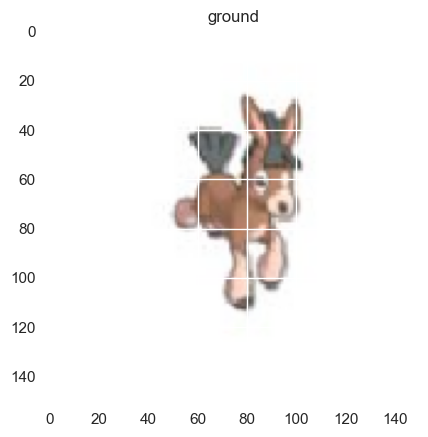

In [164]:
index = 0
plt.title(labels[tf.argmax(label[index])])
plt.imshow(image[index])

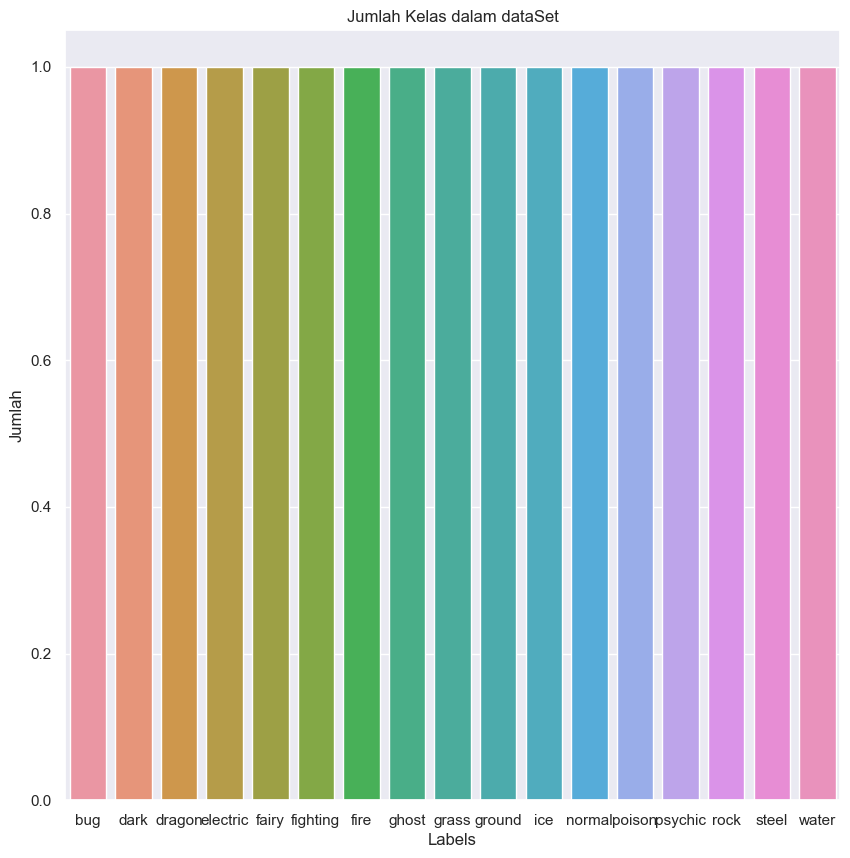

In [180]:
gambar = 60

plt.figure(figsize=(10, 10))
sns.set_theme()

sns.countplot(x=labels)
plt.xlabel('Labels')
plt.ylabel('Jumlah')
plt.title('Jumlah Kelas dalam dataSet')
plt.show()

# Data Modeling

In [193]:
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu',input_shape=[150, 150, 3]),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(17, activation='softmax')
])



In [194]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 180000)            0         
                                                                 
 dense_27 (Dense)            (None, 128)               23040128  
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                     

In [195]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [196]:
hasil = model.fit(train_generator,validation_data=val_generator, epochs=20)

Epoch 1/20
281/281 [==============================] - 45s 159ms/step - loss: 2.9057 - accuracy: 0.0868 - val_loss: 2.8072 - val_accuracy: 0.1003
Epoch 2/20
281/281 [==============================] - 43s 152ms/step - loss: 2.6862 - accuracy: 0.1474 - val_loss: 2.9216 - val_accuracy: 0.0951
Epoch 3/20
281/281 [==============================] - 43s 152ms/step - loss: 2.5518 - accuracy: 0.1855 - val_loss: 2.9416 - val_accuracy: 0.0951
Epoch 4/20
281/281 [==============================] - 41s 147ms/step - loss: 2.3788 - accuracy: 0.2663 - val_loss: 3.4471 - val_accuracy: 0.0900
Epoch 5/20
281/281 [==============================] - 40s 142ms/step - loss: 2.1432 - accuracy: 0.3317 - val_loss: 3.3238 - val_accuracy: 0.1260
Epoch 6/20
281/281 [==============================] - 42s 151ms/step - loss: 1.9540 - accuracy: 0.3841 - val_loss: 3.2538 - val_accuracy: 0.1542
Epoch 7/20
281/281 [==============================] - 50s 177ms/step - loss: 1.7461 - accuracy: 0.4685 - val_loss: 3.4092 - val_ac

In [197]:
#train
y_acc_train = hasil.history['accuracy']
y_acc_val = hasil.history['val_accuracy']

#validation
y_loss_train = hasil.history['loss']
y_loss_val = hasil.history['val_loss']

#epoch
x_ = range(len(y_acc_train))

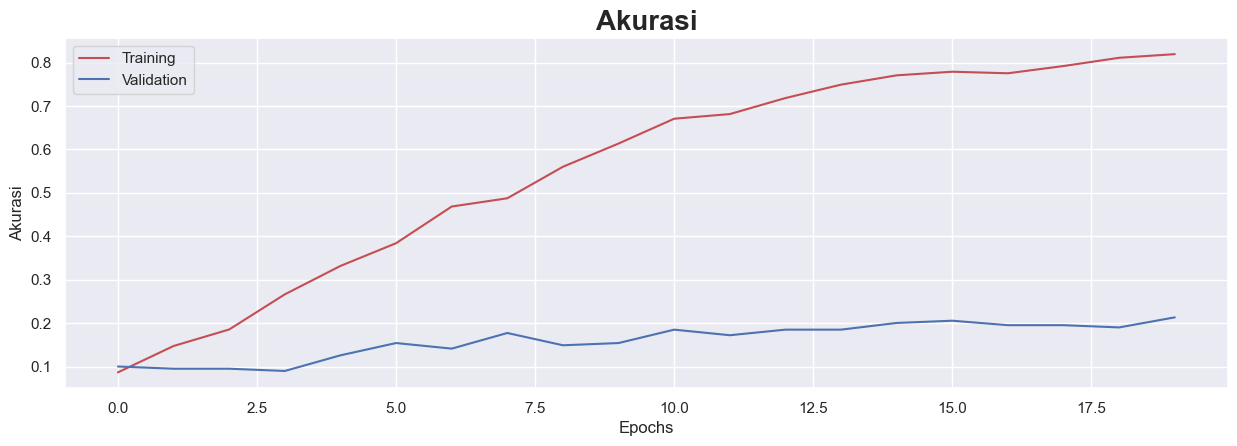

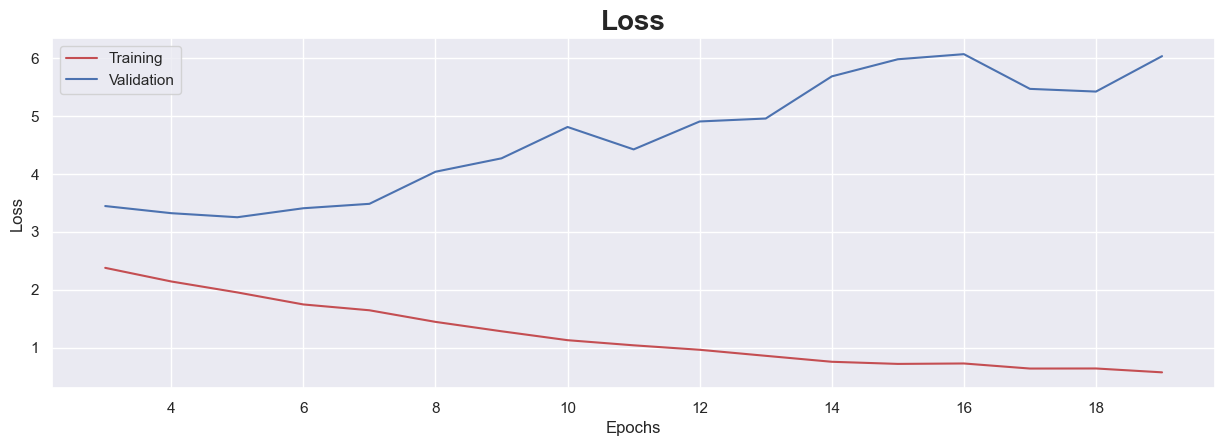

In [198]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(x_, y_acc_train, c='r', label='Training')
plt.plot(x_, y_acc_val, c='b', label='Validation')
plt.title('Akurasi',fontsize=20,fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.figure(figsize=(15,10))
plt.subplot(2,1,2)
plt.plot(x_[3:], y_loss_train[3:], c='r', label='Training')
plt.plot(x_[3:], y_loss_val[3:], c='b', label='Validation')
plt.title('Loss',fontsize=20,fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Data Evaluate

In [199]:
evaluasi = model.evaluate(val_generator, verbose = 0)

print(f'Test loss     : {evaluasi[0]}')
print(f'Test accuracy : {round(evaluasi[1],2)}')

Test loss     : 6.038405895233154
Test accuracy : 0.21


In [200]:
MODEL_BASE_PATH = "model"
SAVE_MODEL_NAME = "model.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH))
    
print('Sedang Menyimpan Model...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Sedang Menyimpan Model...
